In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
from matplotlib.colors import LogNorm
import matplotlib
import matplotlib.font_manager as fm
# %matplotlib qt5
# matplotlib.pyplot.ion()

In [12]:
from matplotlib.pyplot import MultipleLocator
#从pyplot导入MultipleLocator类，这个类用于设置刻度间隔

In [2]:
f=pd.read_table('lifetime.dat',sep=' ',names=['Frequency','Lifetime'])

In [16]:
f

,Frequency,Lifetime
0,-0.001505,0.000000
1,-0.000345,0.000000
2,-0.000327,0.000000
3,0.749174,5.917391
4,0.918627,11.050556
...,...,...
16375,4.356354,3.226750
16376,5.295588,2.767202
16377,5.295588,2.767202
16378,5.295588,2.767202


In [3]:
x=f['Frequency']
y=f['Lifetime']

In [ ]:
x,y

In [4]:
f1=f[f['Frequency']>0]

In [5]:
f1

,Frequency,Lifetime
3,0.749174,5.917391
4,0.918627,11.050556
5,1.131592,4.860599
6,1.136409,12.414945
7,1.252449,8.501373
...,...,...
16375,4.356354,3.226750
16376,5.295588,2.767202
16377,5.295588,2.767202
16378,5.295588,2.767202


In [5]:
x=f1['Frequency']
y=f1['Lifetime']

In [6]:
xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)

In [7]:
idx = z.argsort()

In [8]:
x, y, z = x[idx+3], y[idx+3], z[idx]

In [9]:
my_font=fm.FontProperties(fname=r'‪C:\Windows\Fonts\Arial.ttf'[1:])

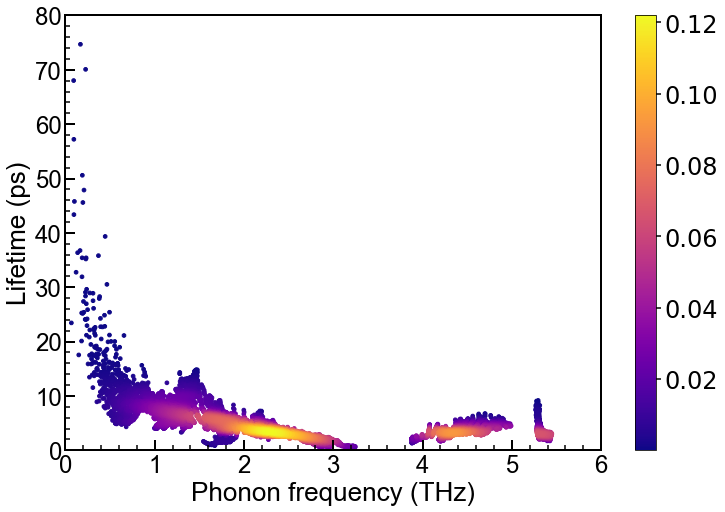

In [38]:
fig, ax = plt.subplots(figsize=(12,8))

plt.xlim((0,6)) #设置坐标轴的显示范围
plt.ylim((0,80))

plt.ylabel('Lifetime (ps)',fontproperties=my_font,fontsize=26) #改变坐标轴标签
plt.xlabel('Phonon frequency (THz)',fontproperties=my_font,fontsize=26)
plt.xticks(fontproperties=my_font,fontsize=24)
plt.yticks(fontproperties=my_font,fontsize=24)
# plt.scatter(x, y,c=-z,  s=5,cmap='Spectral')
# plt.scatter(x, y,c=z,  s=5,cmap='magma')
ax.tick_params(axis='both',which='major',direction='in',width=2,length=10) #刻度朝内
ax.tick_params(axis='both',which='minor',direction='in',width=1.5,length=5)
ax.spines['bottom'].set_linewidth(2);###设置底部坐标轴的粗细
ax.spines['left'].set_linewidth(2);####设置左边坐标轴的粗细
ax.spines['right'].set_linewidth(2);###设置右边坐标轴的粗细
ax.spines['top'].set_linewidth(2);####设置上部坐标轴的粗细


x_minor_locator=MultipleLocator(0.2)
y_minor_locator=MultipleLocator(2)
ax.xaxis.set_minor_locator(x_minor_locator)
ax.yaxis.set_minor_locator(y_minor_locator)


# for line in ax.yaxis.get_ticklines():
#     line.set_markersize(5)

# for line in ax.xaxis.get_ticklines():
#     line.set_markersize(5)


plt.scatter(x, y,c=z,marker='8',s=15,cmap='plasma')

cb=plt.colorbar()
cb.ax.tick_params(labelsize=24)
cb.ax.tick_params(axis='both',width=1.5,length=5)
cbax.spines['bottom'].set_linewidth(2);###设置底部坐标轴的粗细
ax.spines['left'].set_linewidth(2);####设置左边坐标轴的粗细
ax.spines['right'].set_linewidth(2);###设置右边坐标轴的粗细
ax.spines['top'].set_linewidth(2);####设置上部坐标轴的粗细


# plt.savefig('lifetime.png',dpi=600)
plt.show()